Denver Delays 02

Downloaded from 
 - ```https://www.transtats.bts.gov/OT_Delay/ot_delaycause1.asp?display=data&pn=1```

In [160]:
import re
import pandas as pd
import numpy as np
from pygeocoder import Geocoder
import matplotlib as plt
from mpl_toolkits.basemap import Basemap
%matplotlib inline

In [161]:
datafile = '802772815_92017_5649_airline_delay_causes.csv'
df = pd.read_csv(datafile)

In [162]:
df = df.drop('Unnamed: 21', axis=1)

In [230]:
# plt.yscale('log')
var_df = pd.DataFrame(df.var())
var_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, year to late_aircraft_delay
Data columns (total 1 columns):
0    17 non-null float64
dtypes: float64(1)
memory usage: 272.0+ bytes


In [205]:
df.var()

year                   0.000000e+00
 month                 0.000000e+00
arr_flights            1.267147e+06
arr_del15              1.784497e+04
carrier_ct             1.320179e+03
 weather_ct            1.583569e+01
nas_ct                 2.802951e+03
security_ct            1.551256e-01
late_aircraft_ct       2.483348e+03
arr_cancelled          2.820437e+03
arr_diverted           1.189300e+01
 arr_delay             7.206875e+07
 carrier_delay         8.470108e+06
weather_delay          1.789992e+05
nas_delay              8.479285e+06
security_delay         3.416938e+02
late_aircraft_delay    9.703469e+06
dtype: float64

In [167]:
df.shape

(1050, 21)

In [185]:
def get_airport_code(airport_name):
    """function takes in a loosely typed name of city and or airport and 
    returns the airports' three digit code, full name, and coordinates
    It's good to specify the airport if a city has two, such as Dallas Love Field
    and Dallas Fort Worth """
    g = Geocoder.geocode(airport_name)
#     proto_code = str(g.formatted_address)
#     airport_code = proto_code[proto_code.find("(")+1:proto_code.find(")")]
    
    return [str(g.airport), g.coordinates]
get_airport_code('Ohare')

["O'Hare International Airport", (41.9741625, -87.9073214)]

In [186]:
# set the display size
# set the map range of coordinates to display mUSA
plt.rcParams["figure.figsize"] = [50, 30]
mUSA = Basemap(projection='mill', llcrnrlat = 22.5, llcrnrlon = -128,
               urcrnrlat = 52.0, urcrnrlon = -67, resolution='l')

In [151]:
air_dict = dict(zip(df['airport'].unique(), df['airport_name'].unique()))
air_dict

In [187]:
air_dict2 = dict(zip(df['airport_name'].unique(), df['airport'].unique()))
air_dict2

In [188]:
# uniq_airports = df['airport_name'].unique()
uniq_airports = df['airport'].unique()

In [189]:
uniq_airports[25]

'EGE'

In [190]:
get_airport_code('Newark Liberty International Airport')

['Newark Liberty International Airport', (40.6895314, -74.1744624)]

In [191]:
get_airport_code('Eagle, CO: Eagle County Regional')

['Eagle County Regional Airport', (39.6401478, -106.9136058)]

In [192]:
get_airport_code(uniq_airports[25])

['None', (41.2928262, -85.2877537)]

In [146]:
# uniq_airports[0:25]
uniq_airports[25:50]
# uniq_airports[50:75]
# uniq_airports[75:100]
# uniq_airports[100:125]
# uniq_airports[125:150]
# uniq_airports[150:175]
# uniq_airports[175:200]
# uniq_airports[200:225]
# uniq_airports[225:250]
# uniq_airports[250:275]
# uniq_airports[275:293]


array(['EGE', 'ELP', 'EWR', 'FAT', 'FLL', 'GEG', 'GSO', 'GSP', 'HNL',
       'IAD', 'IAH', 'ICT', 'ILM', 'IND', 'JAC', 'JAX', 'JFK', 'KOA',
       'LAS', 'LAX', 'LBB', 'LGA', 'LIH', 'MCI', 'MCO'], dtype=object)

In [158]:
# uniq_airports[0:25]
uniq_airports[25:50]
# uniq_airports[50:75]
# uniq_airports[75:100]
# uniq_airports[100:125]
# uniq_airports[125:150]
# uniq_airports[150:175]
# uniq_airports[175:200]
# uniq_airports[200:225]
# uniq_airports[225:250]
# uniq_airports[250:275]
# uniq_airports[275:293]

array(['EGE', 'ELP', 'EWR', 'FAT', 'FLL', 'GEG', 'GSO', 'GSP', 'HNL',
       'IAD', 'IAH', 'ICT', 'ILM', 'IND', 'JAC', 'JAX', 'JFK', 'KOA',
       'LAS', 'LAX', 'LBB', 'LGA', 'LIH', 'MCI', 'MCO'], dtype=object)

In [197]:
df[['late_aircraft_delay']].describe()

,late_aircraft_delay
count,1048.000000
mean,1220.036260
std,3115.039219
min,0.000000
25%,58.000000
50%,257.500000
75%,868.500000
max,31591.000000


In [ ]:
DEN = get_airport_code('DEN')
DENlat, DENlon = DEN[2]
x_DEN, y_DEN = mUSA(DENlon, DENlat)
olat_dlong = []
olong_dlat = []
olat_dlong.append(x_DEN)
olong_dlat.append(y_DEN)

In [6]:
# get_airport_code('denver airport')
DEN = get_airport_code('DEN')
# create two variables with DIA's lattitude and longitude
DENlat, DENlon = DEN[2]

# create two variables inside the mUSA basemap projection
# these two variables will be the origin variables
x_DEN, y_DEN = mUSA(DENlon, DENlat)
# create empty lists for lineplots
olat_dlong = []
olong_dlat = []
# append the origin variables to lineplot lists
olat_dlong.append(x_DEN)
olong_dlat.append(y_DEN)

In [7]:
mUSA(DENlon, DENlat)[0]
mUSA(DENlon, DENlat)[1]

2135931.09593892

In [8]:
# *****
# Los Angeles
# get_airport_code('Los Angeles airport')
LAX = get_airport_code('Los Angeles airport')

# create two variables with LAX's Lattitude and longitude
LAXlat, LAXlon = LAX[2]
# create two variables inside the mUSA basemap projection
x_LAX, y_LAX = mUSA(LAXlon, LAXlat)
# append the destination variables to lineplot lists
olat_dlong.append(x_LAX)
olong_dlat.append(y_LAX)

/Users/jg/anaconda/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/jg/anaconda/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/Users/jg/anaconda/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/jg/anaconda/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


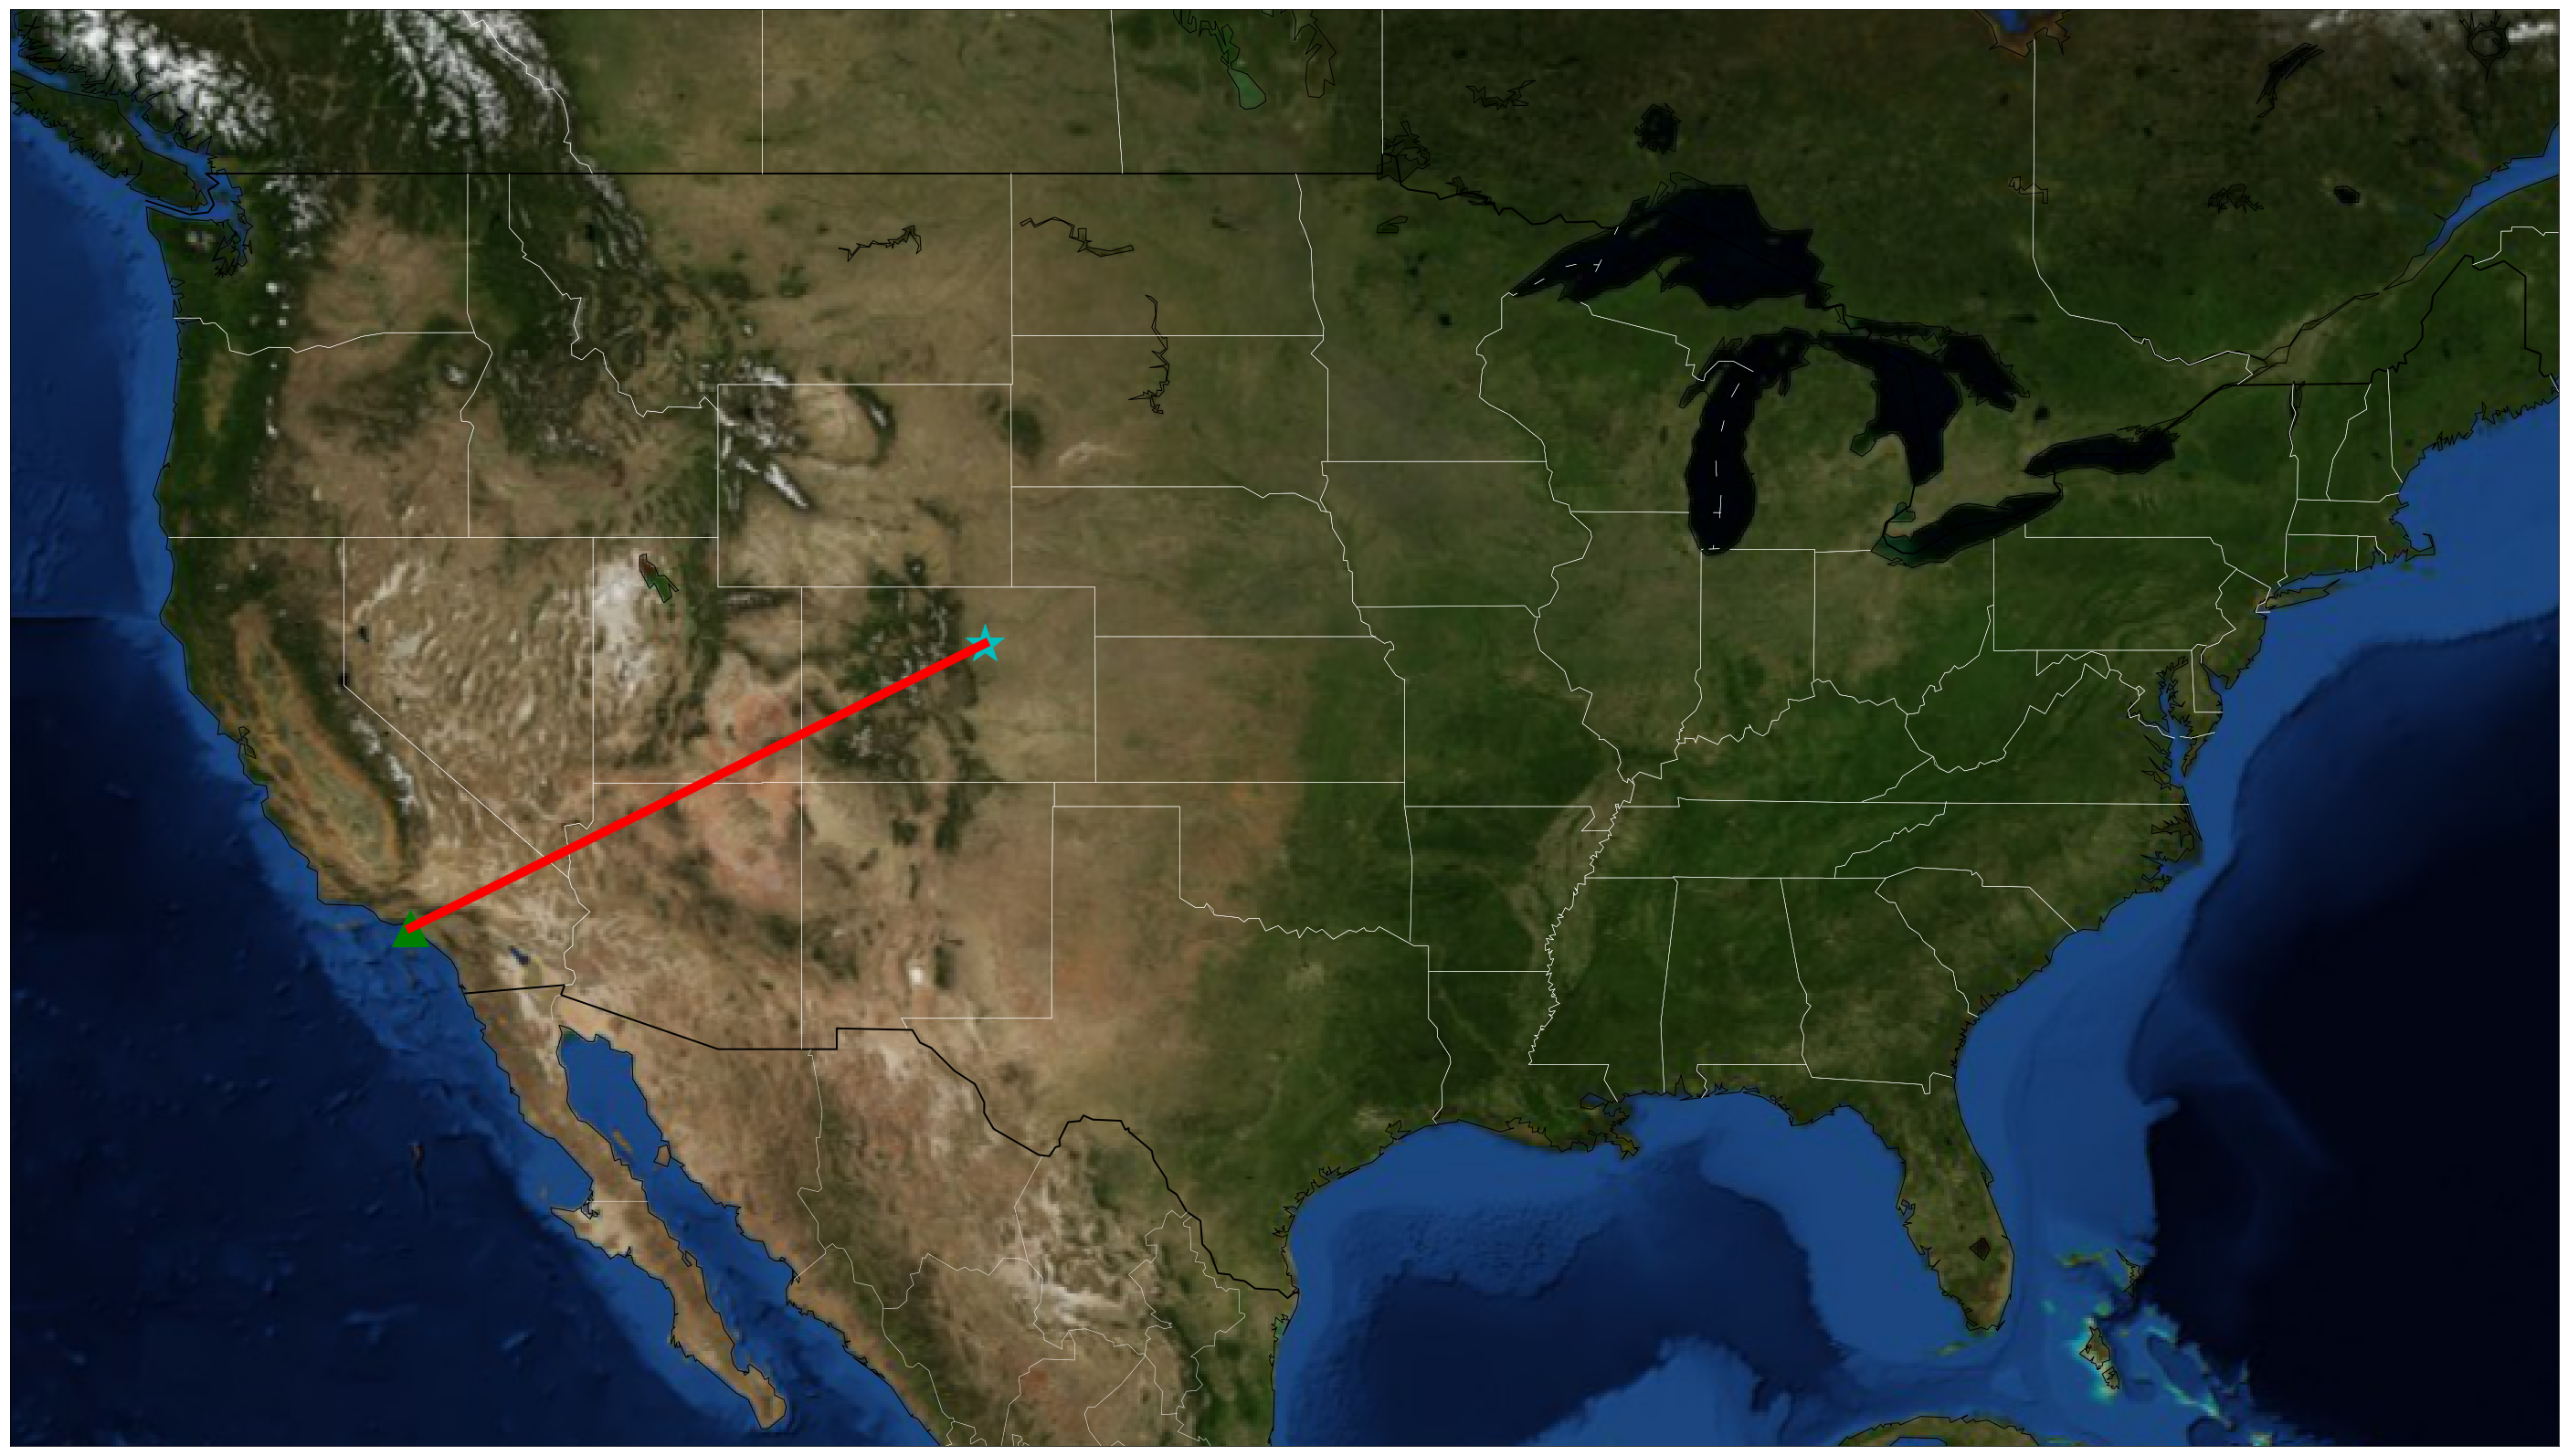

In [9]:
# mark DENVER (origin) with a cyan star
mUSA.plot(x_DEN, y_DEN, 'c*', markersize=45)

# mark Los Angeles (destination) with green triangle
# draw line by providing lineplot lists
mUSA.plot(x_LAX, y_LAX, 'g^', markersize=40)
mUSA.plot(olat_dlong, olong_dlat, color='r', linewidth=10, label='flight')

# # mark San Diego (destination) with green triangle. draw line by providing lineplot lists
# mUSA.plot(x_SAN, y_SAN, 'g^', markersize=40)
# mUSA.plot(xToSAN, yToSAN, color='r', linewidth=10, label='flight')

# # mark Albuquerque (destination) with green triangle. draw line by providing lineplot lists
# mUSA.plot(x_ABQ, y_ABQ, 'g^', markersize=40)
# mUSA.plot(xToABQ, yToABQ, color='r', linewidth=10, label='flight')

# Draw the macro details
mUSA.drawcoastlines()
mUSA.drawcountries(linewidth=2)
mUSA.drawstates(color='w')
mUSA.bluemarble()

In [10]:
# # *****
# # SAN Diego
# SAN = get_airport_code('San Diego airport')
# xToSAN = []
# yToSAN = []

# x_SAN, y_SAN = mUSA(DENlon, DENlat)
# xToSAN.append(x_SAN)
# yToSAN.append(y_SAN)

# SANlat, SANlon = SAN[2]
# x_SAN, y_SAN = mUSA(SANlon, SANlat)
# xToSAN.append(x_SAN)
# yToSAN.append(y_SAN)

In [11]:
# # *****
# # Albuquerque
# ABQ = get_airport_code('ABQ airport')
# xToABQ = []
# yToABQ = []

# x_ABQ, y_ABQ = mUSA(DENlon, DENlat)
# xToABQ.append(x_ABQ)
# yToABQ.append(y_ABQ)

# ABQlat, ABQlon = ABQ[2]
# x_ABQ, y_ABQ = mUSA(ABQlon, ABQlat)
# xToABQ.append(x_ABQ)
# yToABQ.append(y_ABQ)